In [1]:
import matplotlib.pyplot as plt
import numpy as np

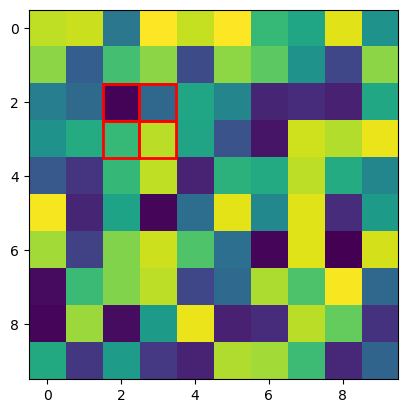

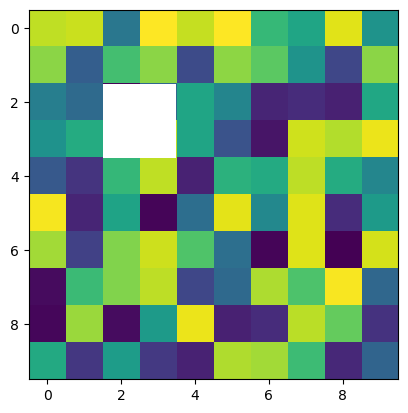

In [2]:
def generate_cell_grid(size):
    """Creates a grid of cells."""
    return np.random.random(size)

def plot_grid(grid, highlighted=None, blanked=None):
    """Plots the grid with highlighted and blanked cells."""
    fig, ax = plt.subplots()
    ax.imshow(grid, cmap='viridis', interpolation='none')

    if highlighted is not None:
        for (i, j) in highlighted:
            rect = plt.Rectangle((j-0.5, i-0.5), 1, 1, linewidth=2, edgecolor='red', facecolor='none')
            ax.add_patch(rect)
    
    if blanked is not None:
        for (i, j) in blanked:
            rect = plt.Rectangle((j-0.5, i-0.5), 1, 1, facecolor='white', edgecolor='none')
            ax.add_patch(rect)

    plt.show()

# Generate a grid representing the cells
grid_size = (10, 10)  # Example 10x10 grid
grid = generate_cell_grid(grid_size)

# Example batches to highlight and blank out
highlighted_batch = [(2, 2), (2, 3), (3, 2), (3, 3)]
blanked_batch = [(2, 2), (2, 3), (3, 2), (3, 3)]

# Plot the initial grid with highlighted batch
plot_grid(grid, highlighted=highlighted_batch)

# Plot the next step with the batch blanked out
plot_grid(grid, blanked=blanked_batch)

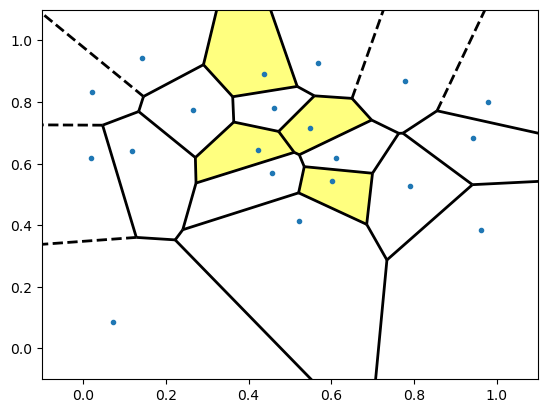

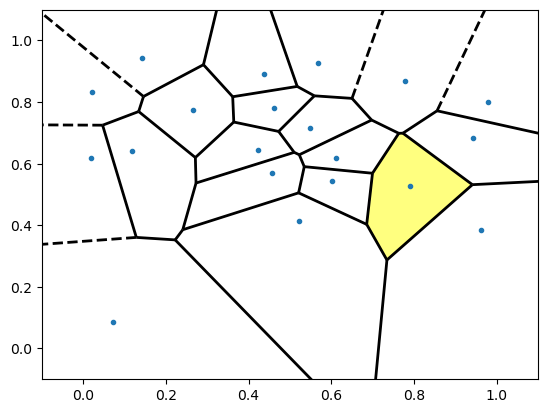

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

def generate_voronoi_diagram(points, highlighted=None, blanked=None):
    """Generates and plots a Voronoi diagram with options to highlight or blank regions."""
    vor = Voronoi(points)
    fig, ax = plt.subplots()
    voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='black', line_width=2)
    
    if highlighted is not None:
        for idx in highlighted:
            region = vor.regions[vor.point_region[idx]]
            if not -1 in region:  # ignore regions that extend to infinity
                polygon = [vor.vertices[i] for i in region]
                plt.fill(*zip(*polygon), color='yellow', edgecolor='red', alpha=0.5)
    
    if blanked is not None:
        for idx in blanked:
            region = vor.regions[vor.point_region[idx]]
            if not -1 in region:  # ignore regions that extend to infinity
                polygon = [vor.vertices[i] for i in region]
                plt.fill(*zip(*polygon), color='white', edgecolor='black', alpha=0.5)
    
    plt.xlim(-0.1, 1.1)
    plt.ylim(-0.1, 1.1)
    plt.show()

# Generate random points to represent cell locations
np.random.seed(0)
points = np.random.rand(20, 2)  # 20 cells in a unit square

# Define batches to highlight/blank out
highlighted_batch = [0, 1, 2, 3]
blanked_batch = [4, 5, 6, 7]

# Initial Voronoi diagram with highlighted batch
generate_voronoi_diagram(points, highlighted=highlighted_batch)

# Subsequent step with blanked out batch
generate_voronoi_diagram(points, blanked=highlighted_batch, highlighted=blanked_batch)


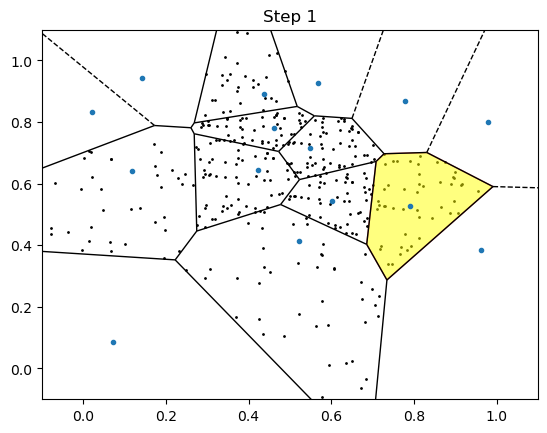

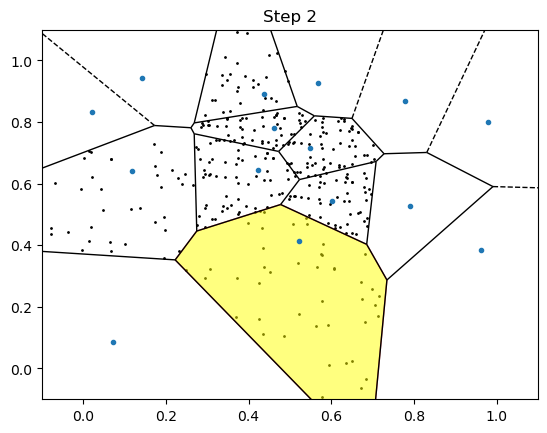

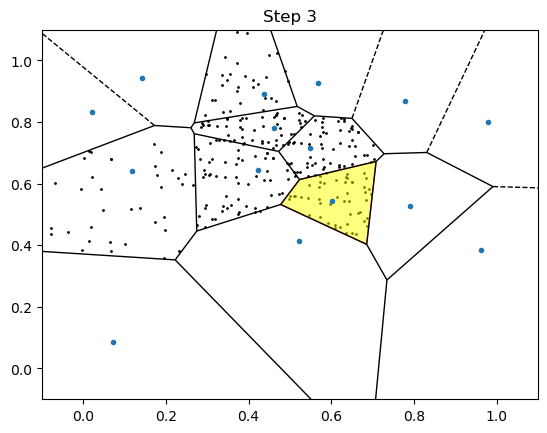

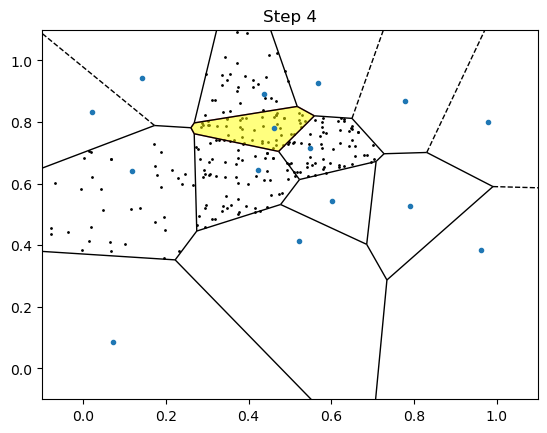

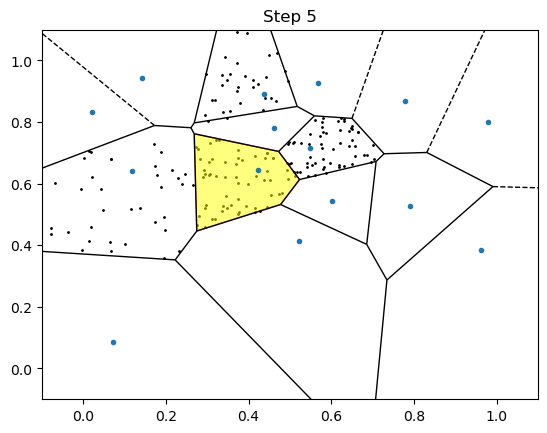

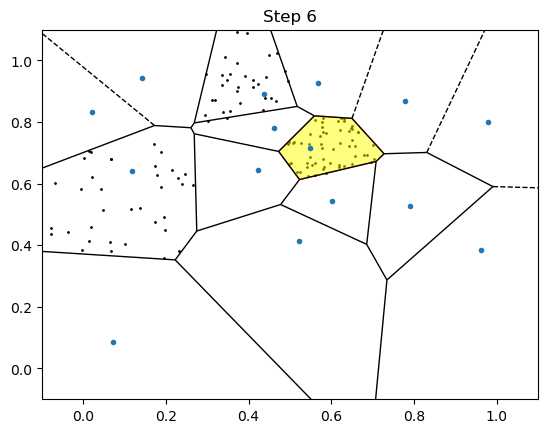

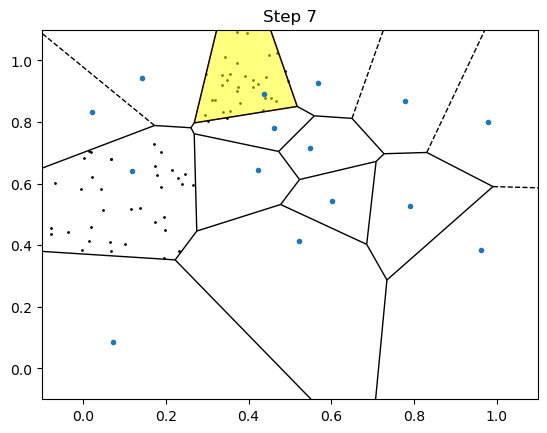

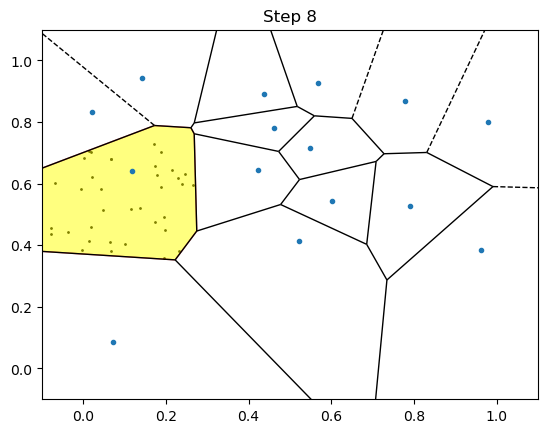

IndexError: list index out of range

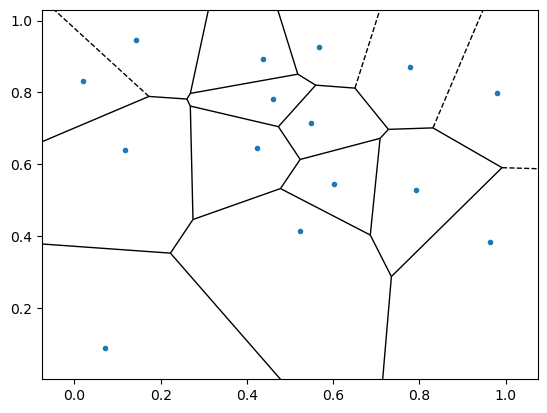

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d
from matplotlib.patches import Polygon

def generate_voronoi_diagram_with_cells(points, highlighted=None, blanked=None, step=1):
    """Generates and plots a Voronoi diagram with cells in each region."""
    vor = Voronoi(points)
    fig, ax = plt.subplots()
    
    # Plot the basic Voronoi diagram
    voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='black', line_width=1)
    
    valid_regions= {}
    for i, region in enumerate(vor.regions):
        if not -1 in region and region:
        # if region:
            valid_regions[i] = region

    highlighted= list(valid_regions.keys())[highlighted]
    blanked= [list(valid_regions.keys())[i] for i in blanked]
    # import pdb; pdb.set_trace()
    # Number the regions and add dots inside each region
    regions_dots = {}
    for i, region in valid_regions.items():
        polygon = [vor.vertices[j] for j in region]
        polygon = np.array(polygon)
        min_x, max_x = np.min(polygon[:, 0]), np.max(polygon[:, 0])
        min_y, max_y = np.min(polygon[:, 1]), np.max(polygon[:, 1])
        np.random.seed(1)
        # Generate dots within the region's bounding box and filter those inside the region
        dots_x = np.random.uniform(min_x, max_x, 100)  # 100 dots per region
        dots_y = np.random.uniform(min_y, max_y, 100)
        path = Polygon(polygon, closed=True).get_path()
        dots_inside = path.contains_points(np.vstack((dots_x, dots_y)).T)
        regions_dots[i] = (dots_x[dots_inside], dots_y[dots_inside])
        
        # Plot the dots
        # print(step, i, region)
        if blanked is None or i not in blanked:
            ax.scatter(dots_x[dots_inside], dots_y[dots_inside], color='black', s=1)
        
        # # Add the region number
        # centroid = np.mean(polygon, axis=0)
        # ax.text(centroid[0], centroid[1], str(i), ha='center', va='center', fontsize=12, color='blue')

    # Highlight a specific region
    if highlighted is not None:
        # region = vor.regions[vor.point_region[highlighted]]
        region = vor.regions[highlighted]
        if not -1 in region:
            polygon = [vor.vertices[i] for i in region]
            plt.fill(*zip(*polygon), color='yellow', edgecolor='red', alpha=0.5)

    plt.xlim(-0.1, 1.1)
    plt.ylim(-0.1, 1.1)
    plt.title(f"Step {step}")
    plt.show()

# Generate random points to represent cell locations
np.random.seed(0)
points = np.random.rand(15, 2)  # 10 cells in a unit square

# Define the order in which regions are highlighted and subsequently blanked out
# highlight_order = [0, 1, 2, 3, 4]
# blanked_order = [[], [0], [0, 1], [0, 1, 2], [0, 1, 2, 3]]
highlight_order = list(range(len(points)))
blanked_order = [list(range(i)) for i in range(len(points) + 1)]
# Generate the diagrams
for i in range(len(highlight_order)):
    generate_voronoi_diagram_with_cells(points, 
                                        highlighted=highlight_order[i], 
                                        blanked=blanked_order[i],
                                        step=i+1)


IndexError: list index out of range

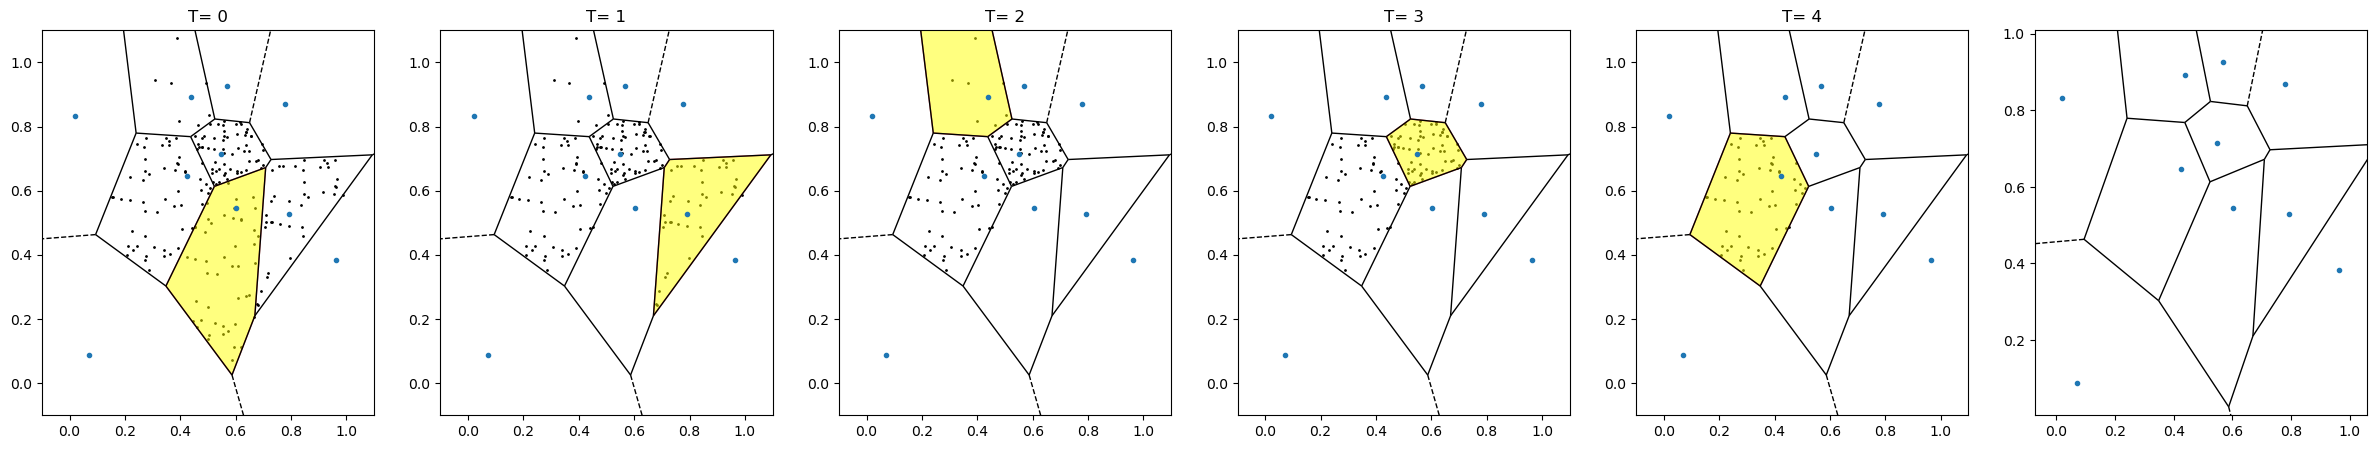

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d
from matplotlib.patches import Polygon

def generate_voronoi_diagram_with_cells(ax, points, highlighted=None, blanked=None, step=1):
    """Generates and plots a Voronoi diagram with cells in each region."""
    vor = Voronoi(points)
    
    # Plot the basic Voronoi diagram
    voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='black', line_width=1)
    
    valid_regions = {}
    for i, region in enumerate(vor.regions):
        if not -1 in region and region:
            valid_regions[i] = region

    highlighted = list(valid_regions.keys())[highlighted]
    blanked = [list(valid_regions.keys())[i] for i in blanked]

    # Number the regions and add dots inside each region
    regions_dots = {}
    for i, region in valid_regions.items():
        polygon = [vor.vertices[j] for j in region]
        polygon = np.array(polygon)
        min_x, max_x = np.min(polygon[:, 0]), np.max(polygon[:, 0])
        min_y, max_y = np.min(polygon[:, 1]), np.max(polygon[:, 1])
        np.random.seed(1)
        # Generate dots within the region's bounding box and filter those inside the region
        dots_x = np.random.uniform(min_x, max_x, 100)  # 100 dots per region
        dots_y = np.random.uniform(min_y, max_y, 100)
        path = Polygon(polygon, closed=True).get_path()
        dots_inside = path.contains_points(np.vstack((dots_x, dots_y)).T)
        regions_dots[i] = (dots_x[dots_inside], dots_y[dots_inside])
        
        # Plot the dots
        if blanked is None or i not in blanked:
            ax.scatter(dots_x[dots_inside], dots_y[dots_inside], color='black', s=1)

    # Highlight a specific region
    if highlighted is not None:
        region = vor.regions[highlighted]
        if not -1 in region:
            polygon = [vor.vertices[i] for i in region]
            ax.fill(*zip(*polygon), color='yellow', edgecolor='red', alpha=0.5)

    ax.set_xlim(-0.1, 1.1)
    ax.set_ylim(-0.1, 1.1)
    ax.set_title(f"T= {step}")

# Generate random points to represent cell locations
np.random.seed(0)
points = np.random.rand(10, 2)  # 15 cells in a unit square

# Define the order in which regions are highlighted and subsequently blanked out
# highlight_order = list(range(len(points)))
# blanked_order = [list(range(i)) for i in range(len(points) + 1)]
highlight_order = list(range(6))
blanked_order = [list(range(i)) for i in range(6 + 1)]

# Create subplots
num_steps = len(highlight_order)
fig, axes = plt.subplots(1, num_steps, figsize=(num_steps * 5, 5))

# Generate the diagrams
for i in range(num_steps):
    generate_voronoi_diagram_with_cells(axes[i], 
                                        points, 
                                        highlighted=highlight_order[i], 
                                        blanked=blanked_order[i],
                                        step=i)

plt.tight_layout()
plt.show()

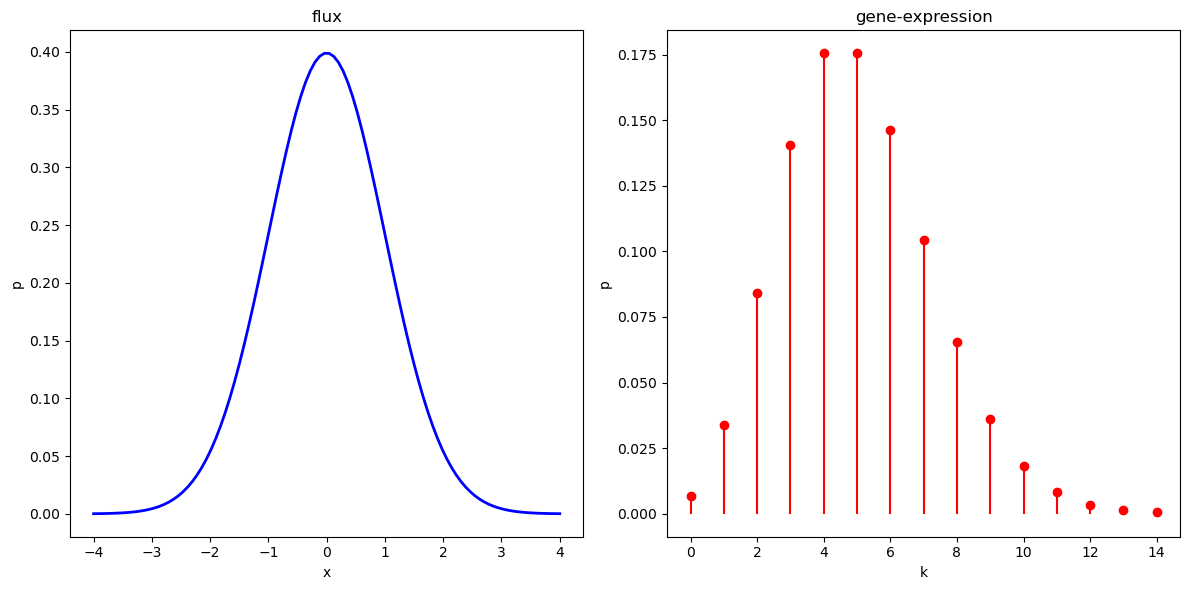

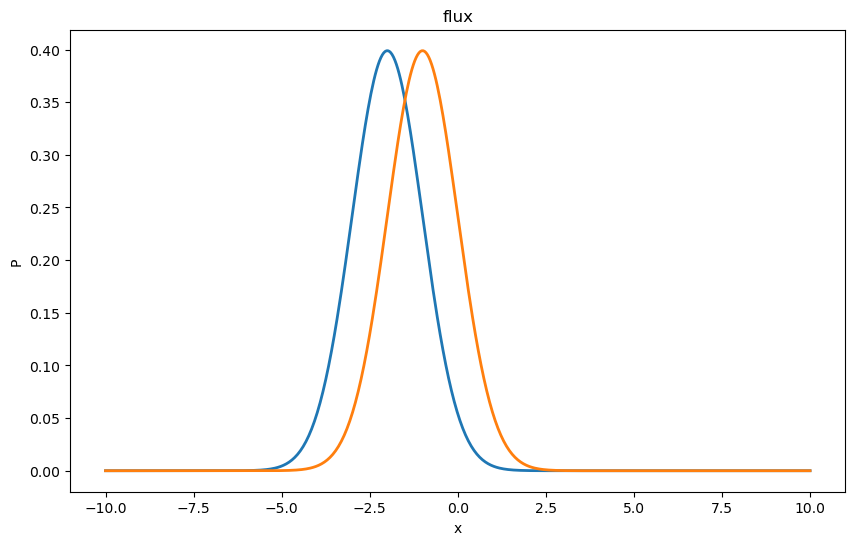

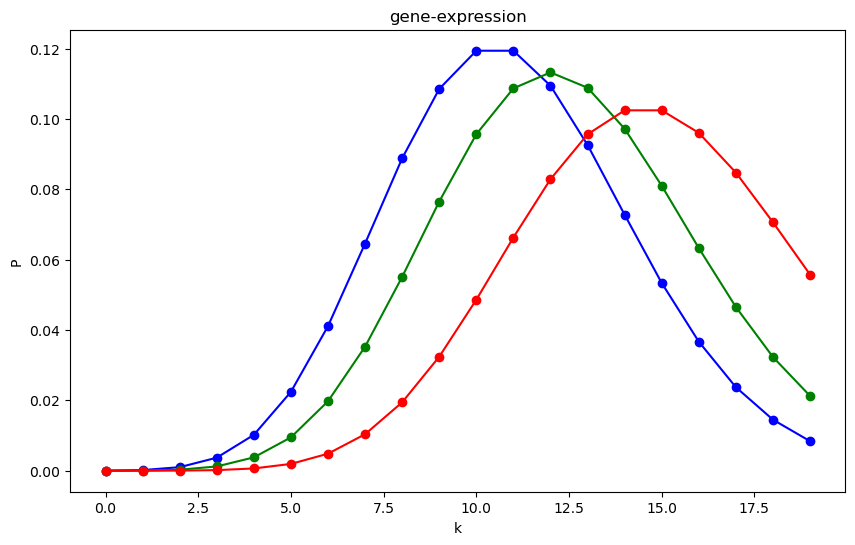

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, poisson

# Data for Gaussian distribution
mu = 0  # mean
sigma = 1  # standard deviation
x_gaussian = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
y_gaussian = norm.pdf(x_gaussian, mu, sigma)

# Data for Poisson distribution
lambda_ = 5  # rate parameter (mean)
x_poisson = np.arange(0, 15)
y_poisson = poisson.pmf(x_poisson, lambda_)

# Plotting the Gaussian distribution
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(x_gaussian, y_gaussian, 'b-', lw=2)
plt.title('flux')
plt.xlabel('x')
plt.ylabel('p')
# plt.grid(True)

# Plotting the Poisson distribution
plt.subplot(1, 2, 2)
plt.stem(x_poisson, y_poisson, 'r', basefmt=" ")
plt.title('gene-expression')
plt.xlabel('k')
plt.ylabel('p')
# plt.grid(True)

plt.tight_layout()
plt.show()



# Parameters for multiple Gaussian distributions
params_gaussian = [
    # {'mu': 0, 'sigma': 1},
    # {'mu': 1, 'sigma': 1},
    # {'mu': 2, 'sigma': 1},
    {'mu': -2, 'sigma': 1},
    {'mu': -1, 'sigma': 1}
]

x = np.linspace(-10, 10, 500)

plt.figure(figsize=(10, 6))
for param in params_gaussian:
    mu = param['mu']
    sigma = param['sigma']
    y = norm.pdf(x, mu, sigma)
    plt.plot(x, y, lw=2, label=f'$\mu$={mu}, $\sigma$={sigma}')

plt.title('flux')
plt.xlabel('x')
plt.ylabel('P')
# plt.legend()
# plt.grid(True)
plt.show()


# Parameters for multiple Poisson distributions
# lambda_values = [2, 3.5, 5, 7.5, 10]
lambda_values = [11, 12.5, 15]
# lambda_values = [2]
# colors = ['b', 'g', 'r', 'c', 'y']  # Define a list of colors
colors = ['b', 'g', 'r']  # Define a list of colors

x = np.arange(0, 20)

plt.figure(figsize=(10, 6))
for lambda_, color in zip(lambda_values, colors):
    y = poisson.pmf(x, lambda_)
    plt.plot(x, y, label=f'$\lambda$={lambda_}', color=color, marker='o', linestyle='-')

plt.title('gene-expression')
plt.xlabel('k')
plt.ylabel('P')
# plt.legend()
# plt.grid(True)
plt.show()